In [1]:
import requests
import re
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in Data

In [2]:
movie = pd.read_csv("../Data/IMDb_Movies.csv")

In [3]:
score = pd.read_csv("../Data/IMDb_Score.csv")

In [4]:
rt = pd.read_csv("../Data/Rotten_Tomatoes.csv")

In [5]:
genre = pd.read_csv("../Data/Genre.csv")

In [6]:
dist = pd.read_csv("../Data/Distributor.csv")

### Movie and RT combined

In [7]:
m_rt = movie.merge(rt, how = 'outer', on = 'Title_ID')

### Movie and Score Combined

In [8]:
m_s = movie.merge(score, how = 'outer', on = 'Score_ID')

### Movie, Score, and RT in One DataFrame

In [9]:
all_df = m_rt.merge(score, how = "left", on = "Score_ID")

### Movie and Genre

In [10]:
m_g = movie.merge(genre, how = 'inner', on = 'Title_ID')

### Movie, Score, and RT in One DataFrame

In [11]:
m_d = movie.merge(dist, how = 'inner', on = 'Title_ID')

# Further Analysis

## Question 5: What is the average length of the movies?

In [12]:
all_df['Runtime'].mean()

128.964

#### The longest movie?

In [13]:
my_max = all_df.nlargest(1,'Runtime')
my_max

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,...,US_Box_Int,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
157,1776158,Gone with the Wind,Victor Fleming,Approved,238,1939,12,22,704158,90,...,19870000.0,8.2,316204,96524,174650,152540,77476,8.1,8.5,82


#### The shortest movie?

In [14]:
my_min = all_df.nsmallest(1,'Runtime')
my_min

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,...,US_Box_Int,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
194,1776195,Sherlock Jr.,Buster Keaton,Approved,45,1924,0,2,704195,93,...,0.0,8.2,50588,13444,32805,31616,4935,8.2,8.2,82


## Question 6: What is the average movie rating?

In [21]:
avg_rating = pd.DataFrame(all_df['Rating'].value_counts()).reset_index()
avg_rating = avg_rating.rename(columns = {'index':'Rating','Rating':'Count'})
avg_rating['Average'] = round((avg_rating['Count']/avg_rating['Count'].sum())*100,2)

#dropping values that have count of 1
avg_drop1 = avg_rating[0:6]
avg_drop1

,Rating,Count,Average
0,R,101,40.4
1,PG,38,15.2
2,PG-13,34,13.6
3,Approved,29,11.6
4,Not Rated,25,10.0
5,G,19,7.6


Graph for AVG Rating

## Question 7: What percentage of movies were "approved" with the Hayes Coded compared to newer movies with the MPAA modern rating system?

## Question 8: What is the range of years of the movies in the Top 250 List?

#### What is the distribution of years?

''

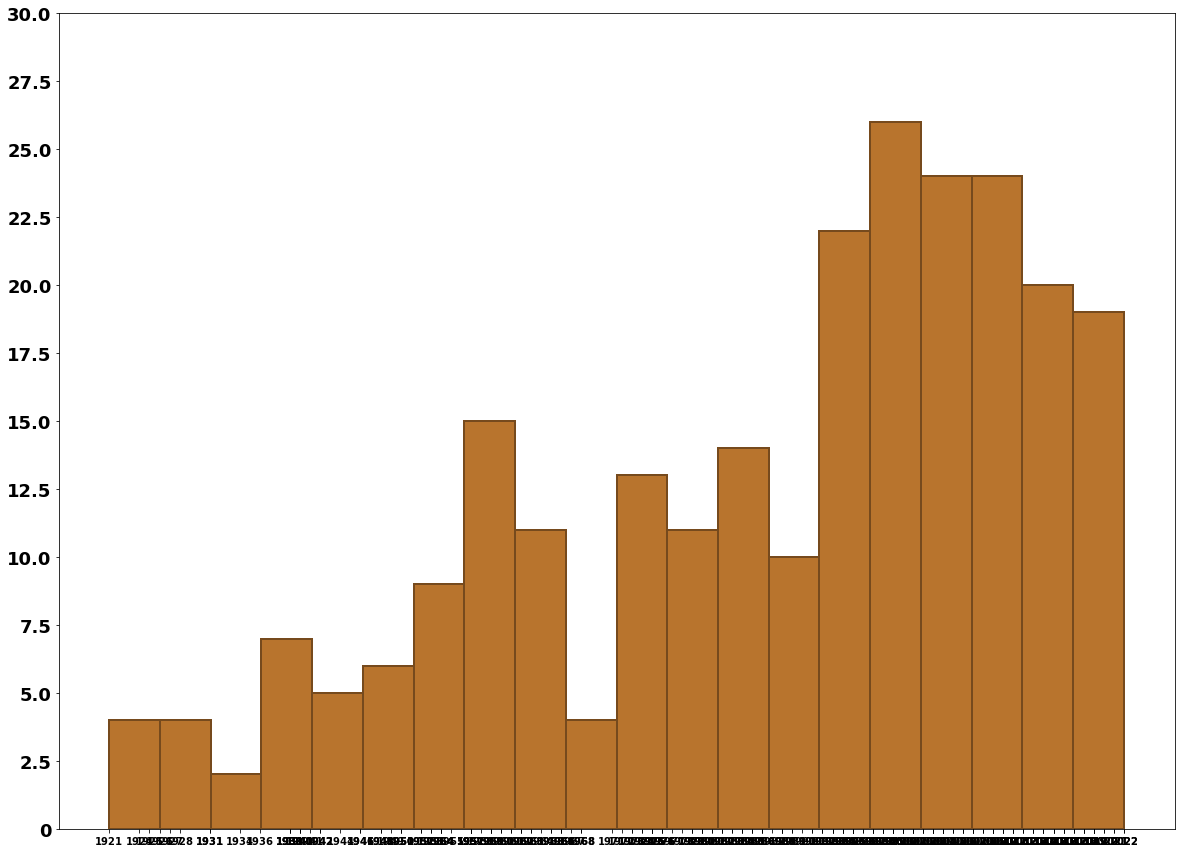

In [55]:
# Bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Define plot size
plt.rcParams['figure.figsize'] = [20, 15]

plt.hist(all_df['Release_Year'], bins=20, 
         color = '#B8742D', edgecolor='#764A1D', linewidth=2)

# Set the x labels
plt.xticks(all_df['Release_Year'])


# Set the y labels
plt.ylim(0, 30)
tick_val = [0,2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0,22.5,25.0,27.5,30.0]
tick_lab = ['0','2.5','5.0','7.5','10.0','12.5','15.0','17.5','20.0','22.5','25.0','27.5','30.0']
plt.yticks(tick_val,tick_lab, size = '18')

;
#title 
# ax.set_title('Top 10 Award Winning Movies', weight = 'bold', 
#              size = '48', x =.51, y=1.03)
# ;

(array([0.00316832, 0.00316832, 0.00158416, 0.00554455, 0.0039604 ,
        0.00475248, 0.00712871, 0.01188119, 0.00871287, 0.00316832,
        0.01029703, 0.00871287, 0.01108911, 0.00792079, 0.01742574,
        0.02059406, 0.0190099 , 0.0190099 , 0.01584158, 0.0150495 ]),
 array([1921.  , 1926.05, 1931.1 , 1936.15, 1941.2 , 1946.25, 1951.3 ,
        1956.35, 1961.4 , 1966.45, 1971.5 , 1976.55, 1981.6 , 1986.65,
        1991.7 , 1996.75, 2001.8 , 2006.85, 2011.9 , 2016.95, 2022.  ]),
 <BarContainer object of 20 artists>)

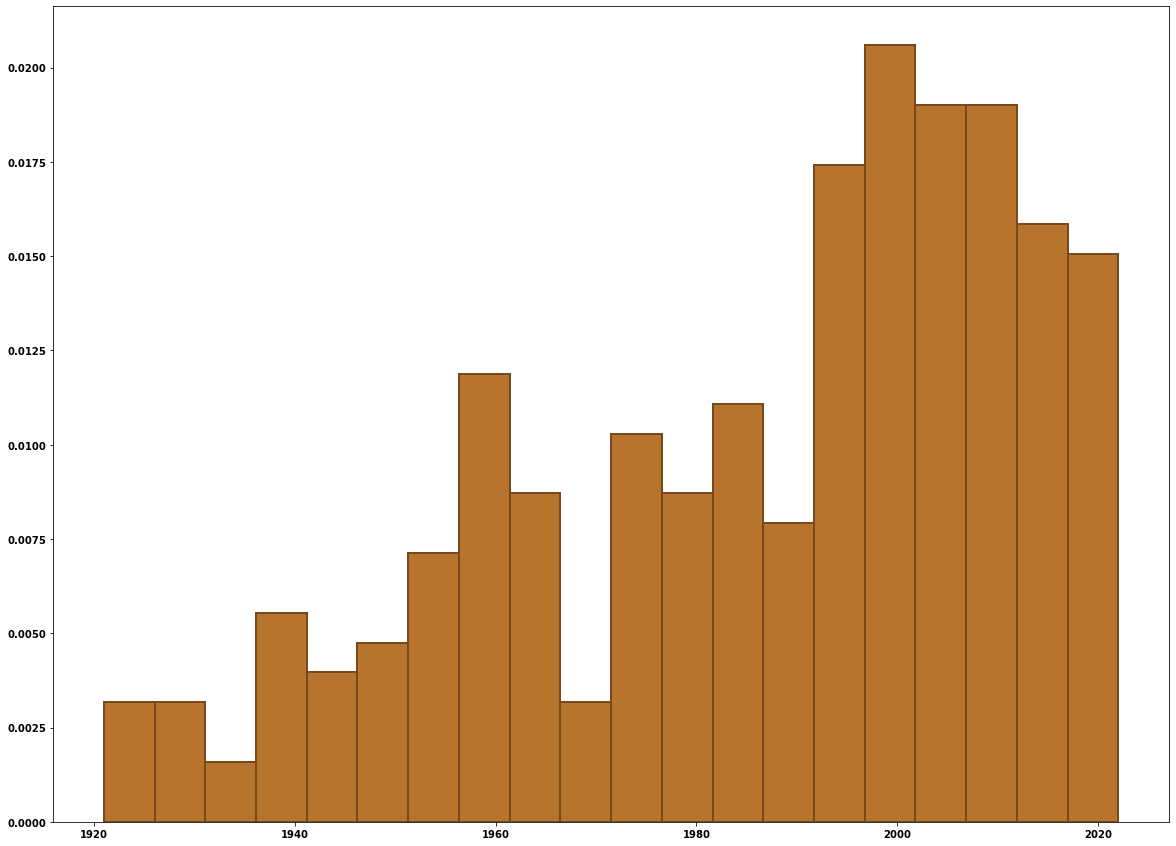

In [45]:
# Bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Define plot size
plt.rcParams['figure.figsize'] = [20, 15]

plt.hist(all_df['Release_Year'], bins=20, 
         color = '#B8742D', edgecolor='#764A1D', linewidth=2, density = True)

#### Are there outliers?

#### What decade were most films released in?

## Question 9: Which directors appear more than once?

## Question 10: What is the average difference between critics' scores and audiences' scores on Rotten Tomotatoes?

## Question 11: How do US-reviewers compare to non-US reviewers on IMDb?

#### Who tends to write more reviews?

#### What is the average scores between the two?

#### What genre interests US-reviewers more? What about non-US reviewers?

NOTE: important to note that the term US and non-US is based on the country the reviewer left the review...does not necessarily indicate that reviewers' citizenship

## Question 12: How many movies are a part of the same cinematic "universe"?

## Question 13: Which distributor has been a part of the most movies in the Top 250 Movie List?

### Random Code for Reference

code for font colors

In [ ]:
### <font color='royalblue'> Visual (Question 2) </font>

see all columns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
all_df